### --- Day 5: Binary Boarding ---

You board your plane only to discover a new problem: you dropped your boarding pass! You aren't sure which seat is yours, and all of the flight attendants are busy with the flood of people that suddenly made it through passport control.

You write a quick program to use your phone's camera to scan all of the nearby boarding passes (your puzzle input); perhaps you can find your seat through process of elimination.

Instead of zones or groups, this airline uses binary space partitioning to seat people. A seat might be specified like FBFBBFFRLR, where F means "front", B means "back", L means "left", and R means "right".

The first 7 characters will either be F or B; these specify exactly one of the 128 rows on the plane (numbered 0 through 127). Each letter tells you which half of a region the given seat is in. Start with the whole list of rows; the first letter indicates whether the seat is in the front (0 through 63) or the back (64 through 127). The next letter indicates which half of that region the seat is in, and so on until you're left with exactly one row.

For example, consider just the first seven characters of FBFBBFFRLR:

Start by considering the whole range, rows 0 through 127.

- F means to take the lower half, keeping rows 0 through 63.
- B means to take the upper half, keeping rows 32 through 63.
- F means to take the lower half, keeping rows 32 through 47.
- B means to take the upper half, keeping rows 40 through 47.
- B keeps rows 44 through 47.
- F keeps rows 44 through 45.

The final F keeps the lower of the two, row 44.

The last three characters will be either L or R; these specify exactly one of the 8 columns of seats on the plane (numbered 0 through 7). The same process as above proceeds again, this time with only three steps. L means to keep the lower half, while R means to keep the upper half.

For example, consider just the last 3 characters of FBFBBFFRLR:

- Start by considering the whole range, columns 0 through 7.
- R means to take the upper half, keeping columns 4 through 7.
- L means to take the lower half, keeping columns 4 through 5.
- The final R keeps the upper of the two, column 5.

So, decoding FBFBBFFRLR reveals that it is the seat at row 44, column 5.

Every seat also has a unique seat ID: multiply the row by 8, then add the column. In this example, the seat has ID 44 * 8 + 5 = 357.

Here are some other boarding passes:

- BFFFBBFRRR: row 70, column 7, seat ID 567.
- FFFBBBFRRR: row 14, column 7, seat ID 119.
- BBFFBBFRLL: row 102, column 4, seat ID 820.

As a sanity check, look through your list of boarding passes. What is the highest seat ID on a boarding pass?

In [1]:
def get_id(seat):
    """
    Simple, literal approach to the problem. For binary approach, see below.
    """
    min_row, max_row = 0, 127
    min_seat, max_seat = 0, 7
    remove_row, remove_col = 64, 4
    
    for i in seat[:6]:
        if i == 'F':
            max_row -= remove_row
        elif i == 'B':
            min_row += remove_row
        remove_row /= 2
    my_row = min_row if seat[6] == 'F' else max_row
    
    for i in seat[7:9]:
        if i == 'L':
            max_seat -= remove_col
        elif i == 'R':
            min_seat += remove_col
        remove_col /= 2 
    my_col = min_seat if seat[9] == 'L' else max_seat
    
    my_id = int(my_row * 8 + my_col)
    
    return(my_id)
            
id_list = []
f = open("advent_day5.txt", "r")
for seat in f:
    id_list.append(get_id(seat))

In [2]:
max(id_list)

838

Based on the problem's name and the fact that we have 7 characters determining our row from 128 possibilities and another 3 determining our column from 8 possibilities, we might spot the hint to take a binary approach (I certainly missed that at first as you can see above...)

For example, seat 'BBBBBBBxxx' would obviously be in the final row and 'FFFFFFFxxx' in the first. Converting these letters to a binary representation and then to base 10 integers would lead to the same conclusion as shown below:

In [3]:
seat_list = ['BBBBBBB', 'FFFFFFF']
for i in seat_list:
    i_converted = i.replace('B','1').replace('F','0')
    print(f'{i} converted to binary (B=1, F=0) and then to base 10 = {int(i_converted,2)}')

BBBBBBB converted to binary (B=1, F=0) and then to base 10 = 127
FFFFFFF converted to binary (B=1, F=0) and then to base 10 = 0


More generally, we can say that the range of possible row numbers is defined as being between 0 and 2^7 - 1. 

We can convert our string to binary (with B = 1, F = 0) and then to base 10 by calculating the sum of the products of b(n) * 2^n where b(n) represents the binary value in position n of our string (starting at 0, moving left). The following figure illustrates this concept in 8 bits:

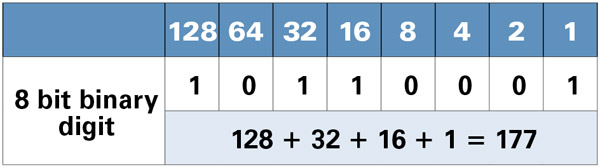

Another example (especially useful for illustrating why the maximum is 2^N - 1):

![BinaryUrl](https://upload.wikimedia.org/wikipedia/commons/7/75/Binary_counter.gif "binary")

With that in mind, we can greatly simplify the previous code as follows:

In [4]:
f = open("advent_day5.txt", "r")

def convert_binary(binary_str):
    replace_dict = {'B':'1', 'F':'0', 'R':'1', 'L':'0'}
    for original, replacement in replace_dict.items():
        binary_str = binary_str.replace(original, replacement)
    return int(binary_str,2)

id_list_2 = []
for seat in f:
    my_row = convert_binary(seat[:7])
    my_col = convert_binary(seat[7:])
    id_list_2.append(my_row * 8 + my_col)

In [5]:
id_list_2 == id_list

True

The lists are the same, confirming that the binary approach generates the same output.

### --- Part Two ---


Ding! The "fasten seat belt" signs have turned on. Time to find your seat.


It's a completely full flight, so your seat should be the only missing boarding pass in your list. However, there's a catch: some of the seats at the very front and back of the plane don't exist on this aircraft, so they'll be missing from your list as well.


Your seat wasn't at the very front or back, though; the seats with IDs +1 and -1 from yours will be in your list.

In [6]:
"""
Since my seat is not at the very front or back, we simply compare
my ID list to one which includes every possible ID between the
minimum and maximum values in my list. My seat should be the only
value which is in my list but missing from the new one.
"""
all_seats = list(range(min(id_list), max(id_list)+1))
set(all_seats).difference(id_list)

{714}